# 1.4.4 Smoothing Images

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

## 2D Convolution (Image Filtering)

In [25]:
resource_path = os.getcwd() + '/resource/'
img = cv2.imread(resource_path + 'opencvLogo.png')
kernel = np.ones((5,5),np.float32)/25

In [26]:
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

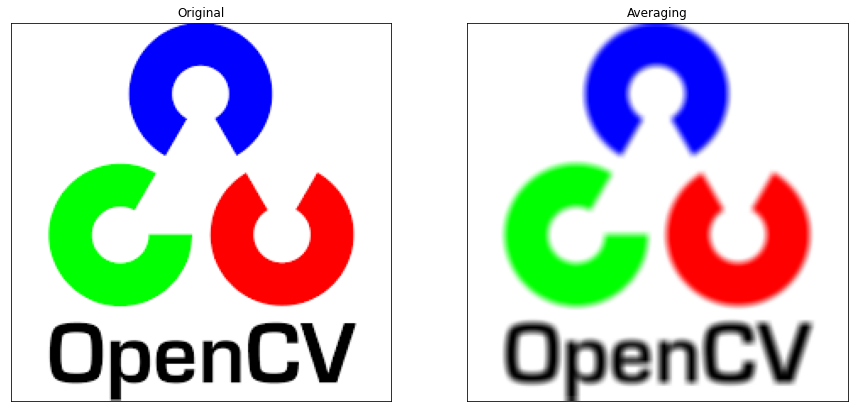

In [27]:
dst = cv2.filter2D(img,-1,kernel)
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

# Image Blurring (Image Smoothing)

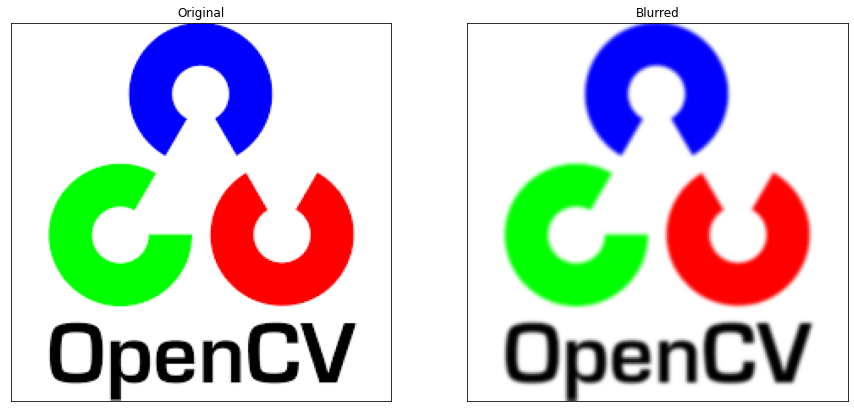

In [28]:
#blur = cv2.blur(img,(5,5))
blur = cv2.GaussianBlur(img,(5,5),0)
#blur = cv2.medianBlur(img,5)
#blur = cv2.bilateralFilter(img,9,75,75)
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

## Kernel Convolution

In [29]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [30]:
l=1
kernel = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]],np.float32)

In [31]:
kernel

array([[ 0., -1.,  0.],
       [-1.,  4., -1.],
       [ 0., -1.,  0.]], dtype=float32)

In [32]:
img = np.random.randint(10, size=(12,12))
#img = np.ones((10,10),np.float32)

In [33]:
img

array([[3, 1, 8, 4, 8, 4, 4, 1, 7, 4, 1, 8],
       [8, 5, 4, 2, 6, 3, 8, 4, 6, 0, 0, 8],
       [5, 5, 2, 2, 3, 8, 8, 4, 0, 9, 3, 8],
       [9, 1, 7, 7, 1, 5, 5, 5, 7, 1, 0, 9],
       [8, 0, 1, 3, 3, 4, 7, 9, 8, 3, 3, 0],
       [7, 1, 5, 3, 4, 8, 5, 3, 3, 9, 7, 4],
       [7, 6, 5, 8, 2, 8, 0, 1, 3, 4, 6, 9],
       [9, 6, 5, 7, 4, 7, 4, 3, 7, 4, 5, 7],
       [7, 3, 6, 6, 9, 2, 1, 3, 6, 6, 4, 4],
       [0, 8, 4, 9, 0, 8, 1, 7, 6, 0, 1, 5],
       [3, 3, 8, 4, 7, 5, 3, 4, 2, 2, 7, 3],
       [3, 9, 5, 7, 6, 4, 5, 7, 2, 5, 5, 8]])

In [34]:
h,w=img.shape

In [35]:
print(h,w)

12 12


In [36]:
#[*range(-2,3)]

In [37]:
dst = np.zeros((h,w),np.int)

In [38]:
for i in range(l,h-l):
    for j in range(l,w-l):
        t=0
        for p in range(-l,l+1):
            for q in range(-l,l+1):
                t += kernel[p+l,q+l]*img[i+p,j+q]
        dst[i,j]=t        

In [39]:
img

array([[3, 1, 8, 4, 8, 4, 4, 1, 7, 4, 1, 8],
       [8, 5, 4, 2, 6, 3, 8, 4, 6, 0, 0, 8],
       [5, 5, 2, 2, 3, 8, 8, 4, 0, 9, 3, 8],
       [9, 1, 7, 7, 1, 5, 5, 5, 7, 1, 0, 9],
       [8, 0, 1, 3, 3, 4, 7, 9, 8, 3, 3, 0],
       [7, 1, 5, 3, 4, 8, 5, 3, 3, 9, 7, 4],
       [7, 6, 5, 8, 2, 8, 0, 1, 3, 4, 6, 9],
       [9, 6, 5, 7, 4, 7, 4, 3, 7, 4, 5, 7],
       [7, 3, 6, 6, 9, 2, 1, 3, 6, 6, 4, 4],
       [0, 8, 4, 9, 0, 8, 1, 7, 6, 0, 1, 5],
       [3, 3, 8, 4, 7, 5, 3, 4, 2, 2, 7, 3],
       [3, 9, 5, 7, 6, 4, 5, 7, 2, 5, 5, 8]])

In [40]:
dst

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   2,  -1,  -8,   8, -14,  13,  -3,  13, -19, -12,   0],
       [  0,   7, -10,  -6,  -5,  13,   7,  -1, -26,  32,  -5,   0],
       [  0, -17,  17,  15, -14,   2,  -5,  -5,  14, -15, -16,   0],
       [  0, -11, -11,  -2,   0,  -7,   5,  13,  10,  -9,   2,   0],
       [  0, -14,  10,  -8,   0,  11,   2,  -6, -11,  19,   6,   0],
       [  0,   5,  -4,  15, -16,  15, -18,  -5,  -3,  -6,  -1,   0],
       [  0,   1,  -4,   5,  -9,  10,   5,  -3,  12,  -6,  -1,   0],
       [  0, -15,   6,  -7,  24, -17,  -6,  -5,   2,  10,   0,   0],
       [  0,  22, -15,  22, -33,  24, -15,  14,   9, -15, -12,   0],
       [  0, -16,  16, -15,  13,  -2,  -3,  -3,  -6,  -6,  17,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [41]:
img = cv2.imread(resource_path + 'lena.png', 0)

In [42]:
h,w=img.shape

In [43]:
dst = np.zeros((h-2*l,w-2*l),np.uint8)

In [44]:
for i in range(l,h-l):
    for j in range(l,w-l):
        t=0
        for p in range(-l,l+1):
            for q in range(-l,l+1):
                t += kernel[p+l,q+l]*img[i+p,j+q]
        dst[i-l,j-l]=t 

In [ ]:
cv2.imshow('img',img)
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()